# 데이터 정의

In [1]:
import numpy as np

# 데이터 정의
x1 = [
    0.8147, 0.9085, 0.127, 0.9134, 0.6324, 0.0975, 0.2785, 0.5469, 0.9575, 0.9649
]
x2 = [
    0.8576, 0.9706, 0.2572, 0.8854, 0.8003, 0.1419, 0.4218, 0.9157, 0.7922, 0.9595
]

y = [1, 1, 0, 1, 0, 0, 0, 1, 0, 1]


## 산점도를 그려 선형적인지. Decision Boundary로 완벽히 나눌 수 있는 문제인지 파악하기

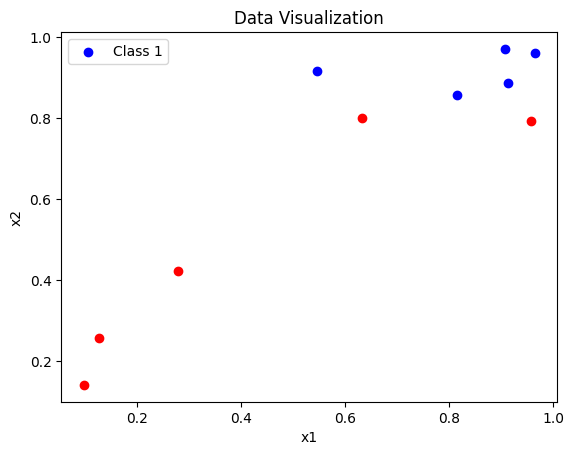

In [2]:
import matplotlib.pyplot as plt

for i in range(len(y)):
    if y[i] == 1:
        plt.scatter(x1[i], x2[i], color='blue', label='Class 1' if i == 0 else "")
    else:
        plt.scatter(x1[i], x2[i], color='red', label='Class 0' if i == 0 else "")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Data Visualization")
plt.show()


In [6]:
# 데이터 준비
X = np.column_stack((np.ones(len(x1)), x1, x2))  # (10x3 행렬), 절편 추가
y = np.array(y).reshape(-1, 1)  # (10x1 벡터)
m, n = X.shape  # 샘플 수, 피처 수

# 가중치 초기화
weights = np.zeros((n, 1))  # (3x1 벡터)

# Sigmoid 함수
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression (행렬 연산)
def logistic_regression(X, y, weights, lr=0.1, epochs=10_000_000):
    for epoch in range(epochs):
        # 1. 예측값 계산
        z = np.dot(X, weights)  # (10x1 벡터)
        y_hat = sigmoid(z)  # (10x1 벡터)

        # 2. 손실 기울기 계산
        gradient = np.dot(X.T, (y_hat - y))  # (3x1 벡터)

        # 3. 가중치 업데이트
        weights -= lr * gradient

        # 4. 100번째 에포크마다 손실 출력
        if epoch % 100 == 0:
            loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return weights

# 모델 훈련
weights = logistic_regression(X, y, weights, lr=0.1, epochs=1000000)

# 최종 결과 출력
print("\nFinal weights:")
print(weights.ravel())

# 최종 예측
z = np.dot(X, weights)
y_pred = sigmoid(z) >= 0.5  # 0.5 기준으로 분류
print("\nPredictions:", y_pred.astype(int).ravel())
print("Actual:", y.ravel())


Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.4050
Epoch 200, Loss: 0.3627
Epoch 300, Loss: 0.3380
Epoch 400, Loss: 0.3194
Epoch 500, Loss: 0.3044
Epoch 600, Loss: 0.2918
Epoch 700, Loss: 0.2810
Epoch 800, Loss: 0.2716
Epoch 900, Loss: 0.2631
Epoch 1000, Loss: 0.2555
Epoch 1100, Loss: 0.2486
Epoch 1200, Loss: 0.2422
Epoch 1300, Loss: 0.2363
Epoch 1400, Loss: 0.2308
Epoch 1500, Loss: 0.2257
Epoch 1600, Loss: 0.2208
Epoch 1700, Loss: 0.2163
Epoch 1800, Loss: 0.2119
Epoch 1900, Loss: 0.2078
Epoch 2000, Loss: 0.2039
Epoch 2100, Loss: 0.2002
Epoch 2200, Loss: 0.1966
Epoch 2300, Loss: 0.1932
Epoch 2400, Loss: 0.1899
Epoch 2500, Loss: 0.1868
Epoch 2600, Loss: 0.1838
Epoch 2700, Loss: 0.1809
Epoch 2800, Loss: 0.1781
Epoch 2900, Loss: 0.1754
Epoch 3000, Loss: 0.1728
Epoch 3100, Loss: 0.1703
Epoch 3200, Loss: 0.1679
Epoch 3300, Loss: 0.1656
Epoch 3400, Loss: 0.1634
Epoch 3500, Loss: 0.1612
Epoch 3600, Loss: 0.1591
Epoch 3700, Loss: 0.1570
Epoch 3800, Loss: 0.1550
Epoch 3900, Loss: 0.1531
Epoch 4000, 

# 모델 성능 평가 confusion matrix 
True Negative (TN): 5<br>
실제 Class 0인 샘플을 모델이 Class 0으로 정확히 예측한 수.<br><br>
False Positive (FP): 0<br>
실제 Class 0인 샘플을 모델이 Class 1로 잘못 예측한 수.<br><br>
False Negative (FN): 0<br>
실제 Class 1인 샘플을 모델이 Class 0으로 잘못 예측한 수.<br><br>
True Positive (TP): 5<br>
실제 Class 1인 샘플을 모델이 Class 1으로 정확히 예측한 수.<br><br>


Confusion Matrix:
[[5 0]
 [0 5]]


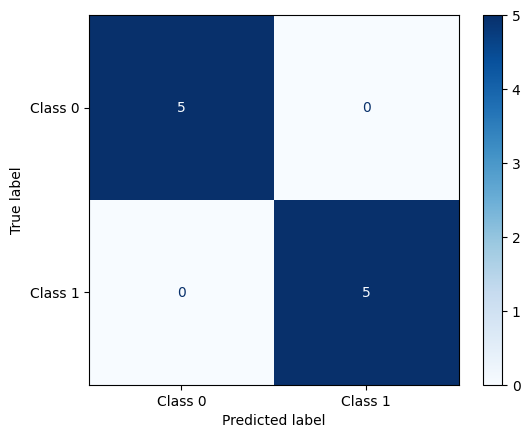

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 훈련 데이터에 대한 예측
z = np.dot(X, weights)
y_pred = (sigmoid(z) >= 0.5).astype(int)  # 0.5 기준으로 분류

# Confusion Matrix 계산
cm = confusion_matrix(y, y_pred)

# Confusion Matrix 출력
print("\nConfusion Matrix:")
print(cm)

# Confusion Matrix 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues")


# 실제로 Decision Boundary가 그려지는 것을 확인해보고 싶어서 시각화

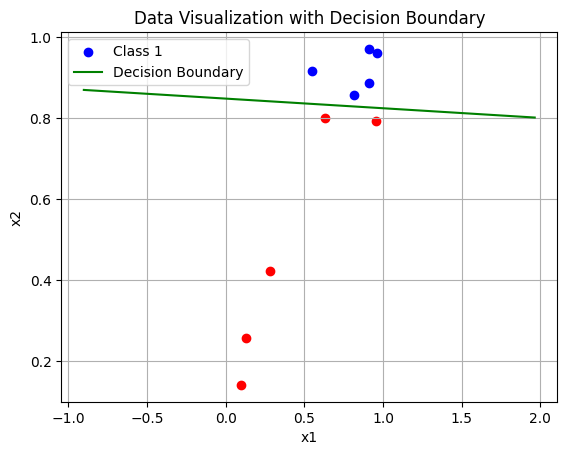

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 가중치(weights)를 기반으로 결정 경계 직선 추가
def plot_with_decision_boundary(x1, x2, y, weights):
    # 데이터 포인트 시각화
    for i in range(len(y)):
        if y[i] == 1:
            plt.scatter(x1[i], x2[i], color='blue', label='Class 1' if i == 0 else "")
        else:
            plt.scatter(x1[i], x2[i], color='red', label='Class 0' if i == 0 else "")

    # 결정 경계 직선 그리기
    # y = -(w0 + w1 * x1) / w2
    x1_range = np.linspace(min(x1) - 1, max(x1) + 1, 100)
    x2_boundary = -(weights[0] + weights[1] * x1_range) / weights[2]

    plt.plot(x1_range, x2_boundary, color='green', label='Decision Boundary')

    # 그래프 스타일 설정
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.title("Data Visualization with Decision Boundary")
    plt.grid(True)
    plt.show()

# 결정 경계 포함된 시각화 호출
plot_with_decision_boundary(x1, x2, y.ravel(), weights)
